# Aula 4

In [1]:
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    '''
    Formata os dados para cada Milhão e mostra duas casas decimais depois da vírgula
    '''
    return "%.2f Mi" % (x/1E6)

In [3]:
mensal = pd.read_csv('https://raw.githubusercontent.com/Pedro-correa-almeida/Bootcamp_alura/main/Modulo_2/dados/dados_aula3', index_col=0)
mensal.index.name='data'
mensal.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
data,,,,,,,,,,,,,,,,,,,,,
2008/Fev,2931283.42,1497206.26,7118990.57,777939.31,19553758.20,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,...,9102212.86,28394310.93,1.486775e+08,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67
2008/Mar,1541682.52,1794028.48,8196635.49,718688.03,21937342.70,974651.24,6205612.60,13985142.36,10298372.45,28724625.75,...,10249595.97,44567062.94,1.560873e+08,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26
2008/Abr,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,...,11253833.56,44054604.82,1.612271e+08,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99
2008/Mai,1645953.84,1819443.92,7831399.90,862347.96,23249952.88,866346.18,5511002.46,14505727.38,10398360.88,30604453.47,...,10198619.17,44911021.15,1.871194e+08,54419620.71,26845308.18,48397733.07,9770421.80,9231645.40,21615970.67,12891719.72
2008/Jun,1406150.68,1828496.00,8477273.62,832440.66,23240687.56,1440978.95,4927934.22,14908091.32,10528253.88,31272395.18,...,13364258.29,48056212.24,1.872911e+08,57811688.48,29909762.04,52413429.62,10905392.18,10221763.77,18270043.87,12850125.67


## Desafio 01: Estudar a documentação datetime do Python

O datetime é um módulo do python com diversas funcionalidades a fim de solucionar problemas relacionados a datas, uma das partes que eu achei mais interessante é como expressar a data com o fuso horário, que é um dos maiores problemas a lidar a hora quando se olha dados de diversos lugares, além disso é um problema que pode passar despercebido, para isso o datetime possui uma função 'timezone' que é possível criar um fuso horário e passar dentro de outra função 'datetime' para criar uma data com o fuso horário registrado, e a partir disso fazer comparações nas datas de diversos países e continesntes distintos.

fonte: [datetime](https://docs.python.org/3/library/datetime.html)

In [4]:
meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def transforma_data(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

In [5]:
mensal.index = mensal.index.map(transforma_data)
mensal.index

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2020-06-01, 2020-07-01, 2020-08-01, 2020-09-01, 2020-10-01, 2020-11-01,
       2020-12-01, 2021-01-01, 2021-02-01, 2021-03-01],
      dtype='object', name='data', length=158)

## Desafio 02: realizar o processo contrário do melt, voltar atrás partindo do mensal_aberto chegando no mensal.

In [33]:
mensal_aberto = mensal.reset_index().melt(id_vars='data', var_name='uf', value_name='gasto')
mensal_aberto

,data,uf,gasto
0,2008-02-01,Rondônia,2931283.42
1,2008-03-01,Rondônia,1541682.52
2,2008-04-01,Rondônia,1525314.96
3,2008-05-01,Rondônia,1645953.84
4,2008-06-01,Rondônia,1406150.68
...,...,...,...
4261,2020-11-01,Distrito Federal,20459325.27
4262,2020-12-01,Distrito Federal,22991567.76
4263,2021-01-01,Distrito Federal,23527050.29
4264,2021-02-01,Distrito Federal,22766952.62


In [42]:
mensal_original = mensal_aberto.pivot_table(values='gasto', columns='uf', index='data')
mensal_original

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
data,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1497206.26,8376622.16,1268740.33,7118990.57,28189304.95,25735101.55,7632480.67,9102212.86,22258668.68,13559679.41,...,10079928.25,9509755.83,5.736342e+07,2.839431e+07,2931283.42,777939.31,25651429.11,3676483.16,1.486775e+08,4985688.85
2008-03-01,1794028.48,8408336.22,974651.24,8196635.49,34181483.52,28724625.75,9647203.26,10249595.97,21442515.75,13985142.36,...,10298372.45,10352238.59,5.154779e+07,4.456706e+07,1541682.52,718688.03,26743524.89,5051473.61,1.560873e+08,6205612.60
2008-04-01,1730469.42,9090794.82,1141137.32,8259378.42,39026934.13,30676457.06,11098732.99,11253833.56,20921212.45,14809416.46,...,10775976.33,10855108.50,5.667334e+07,4.405460e+07,1525314.96,839994.39,27181488.26,5046063.36,1.612271e+08,4984482.09
2008-05-01,1819443.92,9338771.45,866346.18,7831399.90,42949566.82,30604453.47,12891719.72,10198619.17,21615970.67,14505727.38,...,10398360.88,11160168.19,4.839773e+07,4.491102e+07,1645953.84,862347.96,26845308.18,4741151.56,1.871194e+08,5511002.46
2008-06-01,1828496.00,10068210.08,1440978.95,8477273.62,47025972.04,31272395.18,12850125.67,13364258.29,18270043.87,14908091.32,...,10528253.88,10475071.38,5.241343e+07,4.805621e+07,1406150.68,832440.66,29909762.04,5401259.63,1.872911e+08,4927934.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,3276590.10,18597375.56,2218532.26,19895617.91,86257814.00,56916499.66,20459325.27,32030401.25,43037600.45,31942670.33,...,18911604.50,24737052.09,1.088539e+08,8.677650e+07,9357946.29,3621031.05,68460616.55,12264609.05,3.350849e+08,527840.46
2020-12-01,3696997.31,17805273.37,2566919.60,17765167.69,85871122.17,50849353.22,22991567.76,33674687.78,44147353.21,30783403.58,...,20883972.79,23846816.35,1.117605e+08,9.041673e+07,8880836.55,3454460.94,70333079.37,11454427.82,3.304890e+08,675277.05
2021-01-01,3715723.12,17543184.88,2802886.34,21430289.17,79961693.17,52078218.88,23527050.29,39642483.39,46127763.88,30738750.31,...,22689390.32,28044464.51,1.199924e+08,9.417967e+07,9266014.59,3266928.47,71970474.56,12060864.70,3.551495e+08,419553.49


In [43]:
mensal_original.columns.name = None

In [44]:
mensal_original

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
data,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1497206.26,8376622.16,1268740.33,7118990.57,28189304.95,25735101.55,7632480.67,9102212.86,22258668.68,13559679.41,...,10079928.25,9509755.83,5.736342e+07,2.839431e+07,2931283.42,777939.31,25651429.11,3676483.16,1.486775e+08,4985688.85
2008-03-01,1794028.48,8408336.22,974651.24,8196635.49,34181483.52,28724625.75,9647203.26,10249595.97,21442515.75,13985142.36,...,10298372.45,10352238.59,5.154779e+07,4.456706e+07,1541682.52,718688.03,26743524.89,5051473.61,1.560873e+08,6205612.60
2008-04-01,1730469.42,9090794.82,1141137.32,8259378.42,39026934.13,30676457.06,11098732.99,11253833.56,20921212.45,14809416.46,...,10775976.33,10855108.50,5.667334e+07,4.405460e+07,1525314.96,839994.39,27181488.26,5046063.36,1.612271e+08,4984482.09
2008-05-01,1819443.92,9338771.45,866346.18,7831399.90,42949566.82,30604453.47,12891719.72,10198619.17,21615970.67,14505727.38,...,10398360.88,11160168.19,4.839773e+07,4.491102e+07,1645953.84,862347.96,26845308.18,4741151.56,1.871194e+08,5511002.46
2008-06-01,1828496.00,10068210.08,1440978.95,8477273.62,47025972.04,31272395.18,12850125.67,13364258.29,18270043.87,14908091.32,...,10528253.88,10475071.38,5.241343e+07,4.805621e+07,1406150.68,832440.66,29909762.04,5401259.63,1.872911e+08,4927934.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,3276590.10,18597375.56,2218532.26,19895617.91,86257814.00,56916499.66,20459325.27,32030401.25,43037600.45,31942670.33,...,18911604.50,24737052.09,1.088539e+08,8.677650e+07,9357946.29,3621031.05,68460616.55,12264609.05,3.350849e+08,527840.46
2020-12-01,3696997.31,17805273.37,2566919.60,17765167.69,85871122.17,50849353.22,22991567.76,33674687.78,44147353.21,30783403.58,...,20883972.79,23846816.35,1.117605e+08,9.041673e+07,8880836.55,3454460.94,70333079.37,11454427.82,3.304890e+08,675277.05
2021-01-01,3715723.12,17543184.88,2802886.34,21430289.17,79961693.17,52078218.88,23527050.29,39642483.39,46127763.88,30738750.31,...,22689390.32,28044464.51,1.199924e+08,9.417967e+07,9266014.59,3266928.47,71970474.56,12060864.70,3.551495e+08,419553.49


## Desafio 03: Melhorar o gráfico da distribuição do gráfico

Selecionar apenas os estados da região Sudeste

In [77]:
sudeste = ['Rio de Janeiro', 'São Paulo', 'Minas Gerais', 'Espírito Santo']
mensal_sudeste = mensal_aberto[mensal_aberto['uf'].isin(sudeste)]
mensal_sudeste

,data,uf,gasto
2528,2008-02-01,Minas Gerais,7.019404e+07
2529,2008-03-01,Minas Gerais,7.923134e+07
2530,2008-04-01,Minas Gerais,7.713654e+07
2531,2008-05-01,Minas Gerais,8.055444e+07
2532,2008-06-01,Minas Gerais,9.475852e+07
...,...,...,...
3155,2020-11-01,São Paulo,3.350849e+08
3156,2020-12-01,São Paulo,3.304890e+08
3157,2021-01-01,São Paulo,3.551495e+08
3158,2021-02-01,São Paulo,3.488271e+08


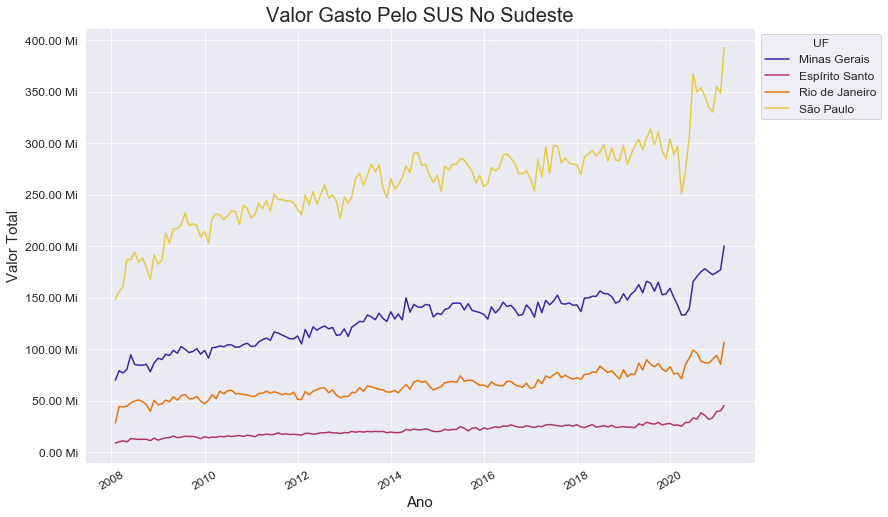

In [80]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando palheta
sns.set_palette(sns.color_palette('CMRmap',4))

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Criando o gráfico
sns.lineplot(x='data', y='gasto', hue='uf', data=mensal_sudeste)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Valor Gasto Pelo SUS No Sudeste', fontsize=20)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=30)
ax.yaxis.set_major_formatter(million_formatter)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='UF', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize=12)

#Mostrando o gráfico
plt.show()

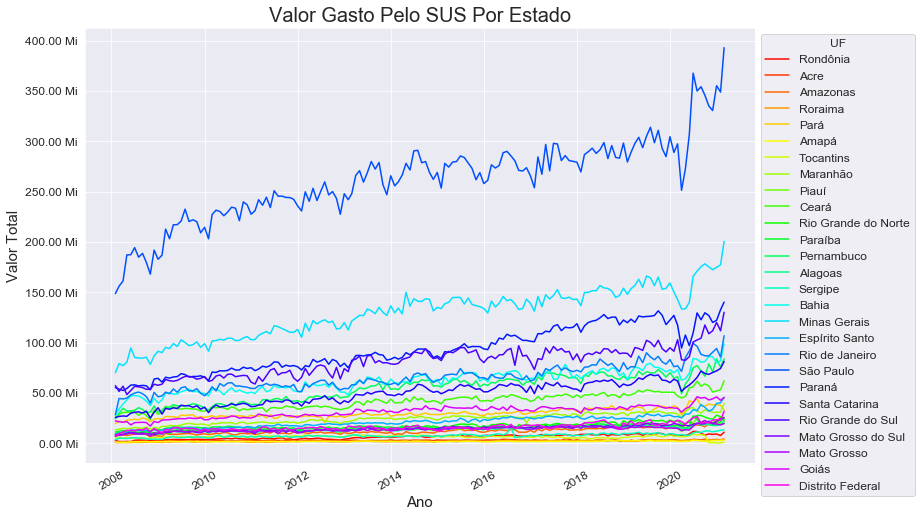

In [81]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando palheta
sns.set_palette(sns.color_palette('gist_rainbow',27))

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Criando o gráfico
sns.lineplot(x='data', y='gasto', hue='uf', data=mensal_aberto)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Valor Gasto Pelo SUS Por Estado', fontsize=20)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=30)
ax.yaxis.set_major_formatter(million_formatter)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title='UF', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize=12)

#Mostrando o gráfico
plt.show()

In [67]:
mensal_aberto.to_csv('C:/Users/pedro/Documents/Bootcamp_alura/Modulo_2/dados/dados_aula4')